# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

At this project We will look for the 7 most popular films in 2021 through the IMDB website https://www.imdb.com.
IMDB is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. 


The parameters analyzed are Title, IMDB Ratings, Meta Score and Votes. The IMDb ratings is generated by the IMDb user ratings through Votes while the Metascore ratings are the scores from the website Metacritic.com that rates movies and video games.
The data to be analyzed are 50 titles out of almost 1 million.

Altough movies are certainly subjective, hopefully we could get insight from this project than can help us, at least, to know what best movies released in 2021 that we have missed


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. now we should search the lines that we want to use. Let's back to our web page first

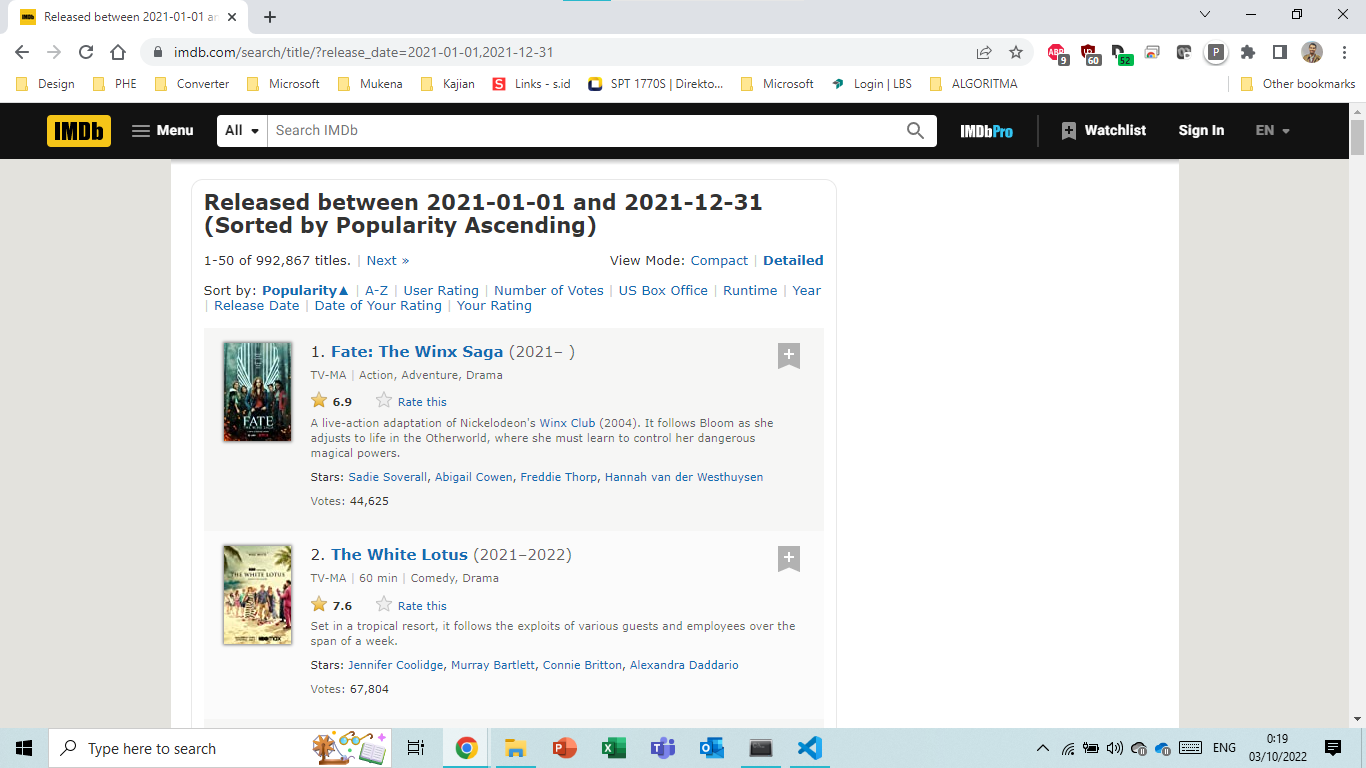

The information that we need are the Title, Ratings at next to yellow star icon, Meta Score highlited green color and Votes at the bottom. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this.

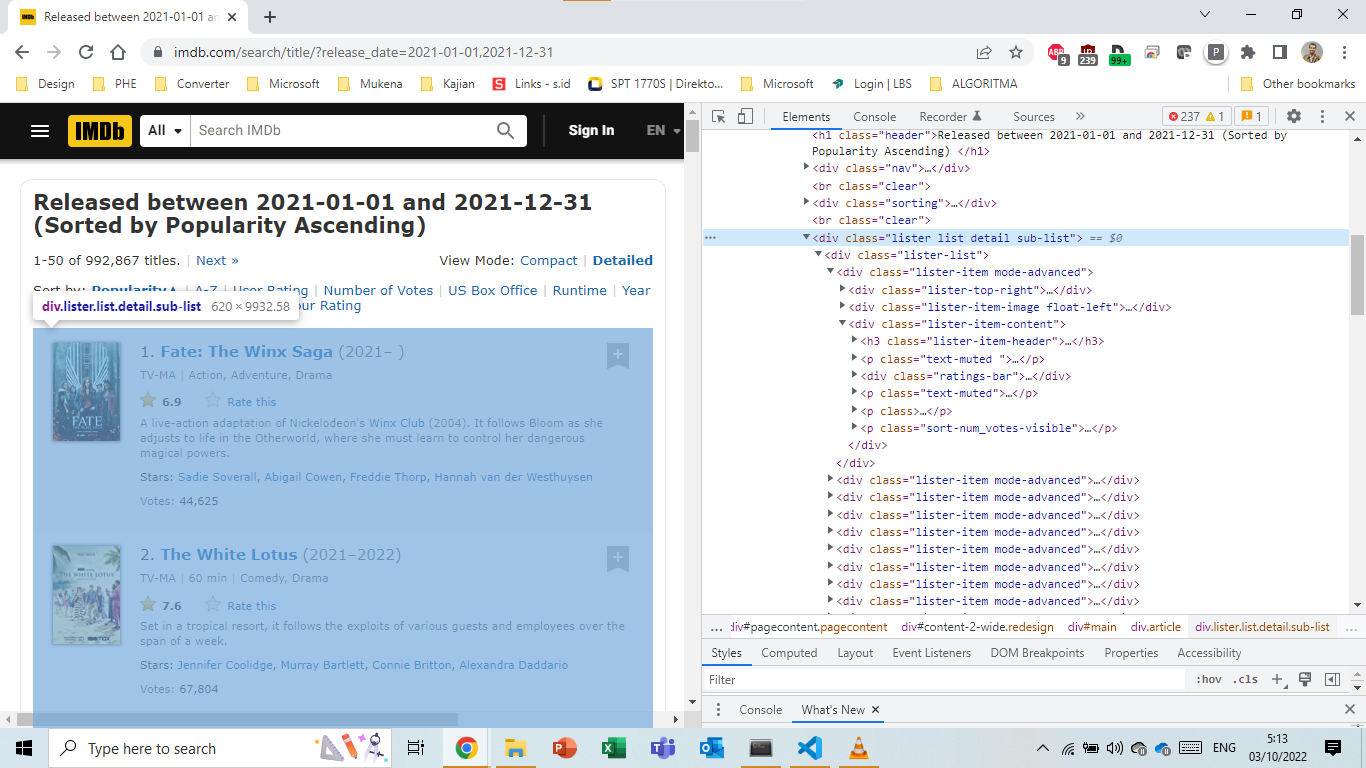

From inspect element we know that we need to find the line table with class `lister list detail sub-list`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get.

In [9]:
table = soup.find('div', attrs={'class':'lister list detail sub-list'})
print(table.prettify()[0:2000])

<div class="lister list detail sub-list">
 <div class="lister-list">
  <div class="lister-item mode-advanced">
   <div class="lister-top-right">
    <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
    </div>
   </div>
   <div class="lister-item-image float-left">
    <a href="/title/tt8179402/">
     <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
    </a>
   </div>
   <div class="lister-item-content">
    <h3 class="lister-item-header">
     <span class="lister-item-index unbold text-primary">
      1.
     </span>
     <a href="/title/tt8179402/">
      Fate: The Winx Saga
     </a>
     <span class="lister-item-year text-muted unbold">
      (2021– )
     </span>
    </h3>
    <p class="te

Finding row length.

As we can see from the line we just extract, we get all the content we needed. As for what is div, The `div` tag defines a division or a section in an HTML document. It is easily styled by using the class or id attribute, Any sort of content can be put inside the `div` tag. 
    
The `find()` function can help you to get you the part of the html code that you needed. While most of the html is contained in `div` you can differsiate them with help of `attrs=`, you can insert anything that in the `div` a the attrs to help you find the part you needed. 

Now, we need to get 4 informations, that is the Title, Ratings, MetaScore and Votes. Which you can read from above code, as follows
1. Title is contained within `h3` with "lister-item-header"
2. Ratings is contained within `div` with "inline-block ratings-imdb-rating"
3. MetaScore is contained within `p`  in "sort-num_votes-visible"
4. Votes is contained within `div` with "ratings-bar"
    
Now I will introduce you to other useful function from beautiful soup, that's `find_all`. While the `find` fuction method is used for finding out the **first tag** with the specified name or id and returning an object of type bs4. The find_all method is used for finding out **all tags** with the specified tag name or id and returning them as a list of type bs4.

For example I'll try to extract the first 5 data of date information from the html. You can use slicer to help you.

In [165]:
# Extracting Title Information
table.find_all("h3", attrs={'class':'lister-item-header'})[0].text

'\n1.\nFate: The Winx Saga\n(2021– )\n'

In [17]:
# Do the cleaning job for Title
# 1st step to remove number using split character '.'
# 2nd step to remove year using split character '('
# 3rd step to remove excess white space
table.find_all("h3", attrs={'class':'lister-item-header'})[0].text.split('.')[1].split('(')[0].strip()

'Fate: The Winx Saga'

In [26]:
#Extracting Ratings Information
table.find_all('div', attrs={'class':'inline-block ratings-imdb-rating'})[0].text.strip()

'6.9'

In [28]:
# Extracting MetaScore Information
table.find_all('div', attrs={'class':'ratings-bar'})[4].text

'\n\n\n7.0\n\n\n\n\nRate this\n\n\n\n\n\n\n\xa0\n\xa0\n\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n\n7/10\nX\n\xa0\n\n\n\n65        \n        Metascore\n            \n'

In [29]:
# Do the cleaning job for MetaScore
# Remove many characters '\n' , '10X\xa0', 'Metascore' using replace function
table.find_all('div', attrs={'class':'ratings-bar'})[4].text.replace('\n','').split('/')[1].replace('10X\xa0','').replace('Metascore','').strip()

'65'

In [24]:
#Extracting Votes Information
table.find_all('p', attrs={'class':'sort-num_votes-visible'})[0].text

'\nVotes:\n44,625\n'

In [32]:
# Do the cleaning job for Votes
table.find_all('p', attrs={'class':'sort-num_votes-visible'})[0].text.replace('\n','').split(':')[1].split('|')[0].strip()

'44,625'

In [30]:
#Row Lenght
Title = table.find_all('h3', attrs={'class':'lister-item-header'})
row_length = len(Title)
row_length

50

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cells of the column one through three which contain Ratings, Meta Score and Votes. 
- Then we will append it to our tuple that we prepared before
- every one iteration we will scrap one line of the table

In [33]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    #get Title
    Title = table.find_all('h3', attrs={'class':'lister-item-header'})[i].text
    Title = Title.split('.')[1] #to remove number with split character "."
    Title = Title.split('(')[0] #to remove number with split character "."
    Title = Title.strip() #to remove excess white space
    Title = Title.replace('\n','') #to remove special character ('\n')
      
    #get Ratings
    Ratings = table.find_all('div', attrs={'class':'inline-block ratings-imdb-rating'})[i].text
    Ratings = Ratings.strip() #to remove excess white space
     
    #get MetaScore
    MetaScore = table.find_all('div', attrs={'class':'ratings-bar'})[i].text.replace('\n','').split('/')[1].replace('10X\xa0','').replace('Metascore','')
    MetaScore = MetaScore.strip() #to remove excess white space  
    
    #get Votes
    Votes = table.find_all('p', attrs={'class':'sort-num_votes-visible'})[i].text
    Votes = Votes.strip() #to remove excess white space
    Votes = Votes.replace('\n','') #to remove special character ('\n')
    Votes = Votes.split(':')[1] 
    Votes = Votes.split('|')[0]
        
    #append for each i
    temp.append((Title,Ratings,MetaScore,Votes))
    
temp 

[('Fate: The Winx Saga', '6.9', '', '44,625'),
 ('The White Lotus', '7.6', '', '67,804'),
 ('Only Murders in the Building', '8.1', '', '96,429'),
 ('Abbott Elementary', '8.2', '', '13,776'),
 ('The Black Phone', '7.0', '65', '113,419'),
 ('Resident Alien', '8.1', '', '39,254'),
 ('American Horror Stories', '6.2', '', '20,802'),
 ('1883', '8.8', '', '63,234'),
 ('Reservation Dogs', '8.1', '', '14,647'),
 ('Spider-Man: No Way Home', '8.3', '71', '730,655'),
 ('La scuola cattolica', '5.7', '', '1,808'),
 ('Dune: Part One', '8.0', '74', '614,595'),
 ('Licorice Pizza', '7.2', '90', '105,672'),
 ('Forsvinningen på Lørenskog', '6.1', '', '1,078'),
 ('Dopesick', '8.6', '', '54,586'),
 ("NCIS: Hawai'i", '6.3', '', '5,542'),
 ('Mona Lisa and the Blood Moon', '6.1', '69', '1,042'),
 ('The Little Things', '6.3', '54', '99,658'),
 ('Bloodlands', '6.6', '', '5,081'),
 ('Arcane: League of Legends', '9.0', '', '197,927'),
 ('Yellowjackets', '7.9', '', '44,903'),
 ('The Wheel of Time', '7.1', '', '102,

## Creating data frame & Data wrangling

Put the array into dataframe

In [36]:
import pandas as pd

Movie2021 = pd.DataFrame(temp, columns = ('Title','Ratings','MetaScore', 'Votes'))
Movie2021.head(10)

,Title,Ratings,MetaScore,Votes
0,Fate: The Winx Saga,6.9,,"44,625"
1,The White Lotus,7.6,,"67,804"
2,Only Murders in the Building,8.1,,"96,429"
3,Abbott Elementary,8.2,,"13,776"
4,The Black Phone,7.0,65,"113,419"
5,Resident Alien,8.1,,"39,254"
6,American Horror Stories,6.2,,"20,802"
7,1883,8.8,,"63,234"
8,Reservation Dogs,8.1,,"14,647"
9,Spider-Man: No Way Home,8.3,71,"730,655"


Let's check our dataframe data types to see if our data is useable. 

In [38]:
Movie2021.dtypes

Title        object
Ratings      object
MetaScore    object
Votes        object
dtype: object

As usual, we need to clean the data, including change the data into proper data type.
we will change Ratings to float data type, remove char ',' on Votes then change to integer data type, and the last is to fill blank value into '0' on Meta Score then change to integer data type

In [39]:
Movie2021['Ratings'] = Movie2021['Ratings'].astype('float64')
Movie2021['Votes'] = Movie2021['Votes'].str.replace(',','')
Movie2021['Votes'] = Movie2021['Votes'].astype('int64')
Movie2021['MetaScore'] = Movie2021['MetaScore'].replace('', "0", regex=False) #Fill blank Value with 0
Movie2021['MetaScore'] = Movie2021['MetaScore'].astype('int64')
Movie2021.dtypes

Title         object
Ratings      float64
MetaScore      int64
Votes          int64
dtype: object

Data visualisation
to make plot behave like we want, we need to set our index of our dataframe to our Title. We can use `set_index()`

In [40]:
Movie2021 = Movie2021.set_index('Title')

In [42]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn-bright')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:title={'center':'7 Best Movies by Ratings - 2021'}, xlabel='Title', ylabel='Ratings & MetaScore'>

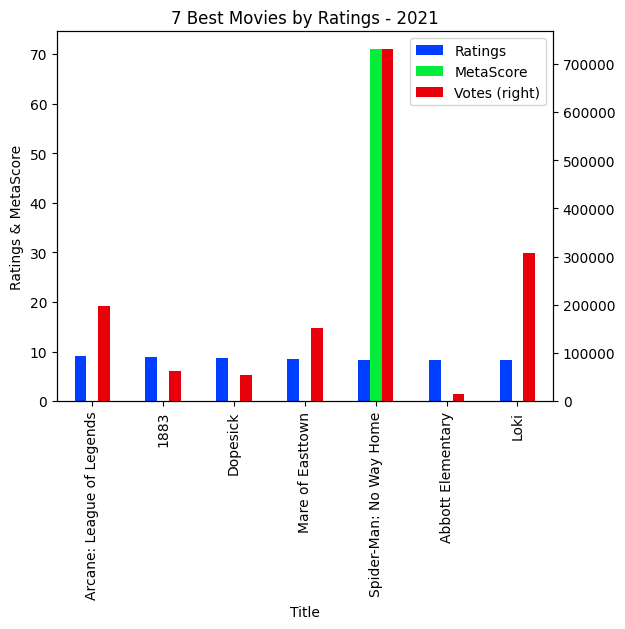

In [161]:
# Insight 1 - 7 Best Movies by Ratings
Best01 = Movie2021.sort_values(by = 'Ratings', ascending = False).head(7)
Best01.plot(kind = 'bar', title = '7 Best Movies by Ratings - 2021', secondary_y='Votes', xlabel= 'Title', ylabel = 'Ratings & MetaScore', legend = True)

From Bar Chart above we have 7 best movies 2021 based on Ratings. We can see that only 1 Title has MetaScore which is "Spider-Man: No Way Home" and it also has the highest Votes among 6 others. If we trust Ratings only, then we have the answer for the 7 best movie 2021.
Let's try another insight based on MetaScore

<AxesSubplot:title={'center':'7 Best Movies by Ratings - 2021'}, xlabel='Title', ylabel='Ratings & MetaScore'>

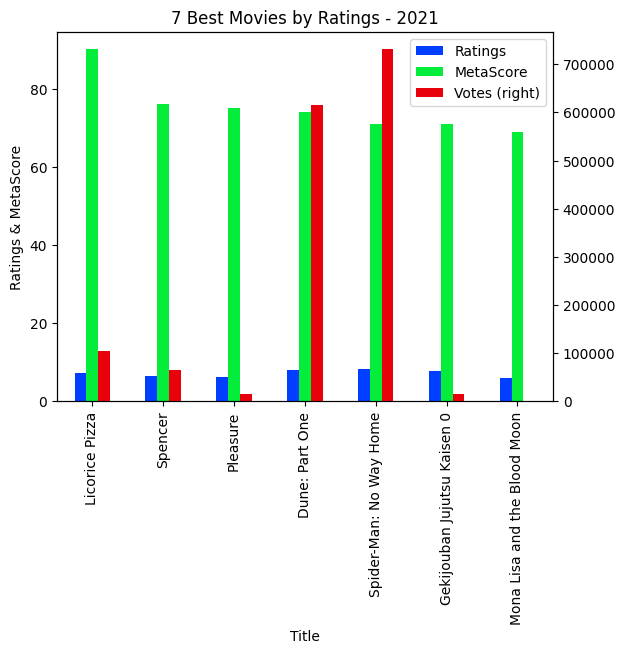

In [162]:
# Insight 2 - 7 Best Movies by Ratings
Best02 = Movie2021.sort_values(by = 'MetaScore', ascending = False).head(7)
Best02.plot(kind = 'bar', title = '7 Best Movies by Ratings - 2021', secondary_y='Votes', xlabel= 'Title', ylabel = 'Ratings & MetaScore', legend = True)

From Bar Chart above we have 7 best movies 2021 based on MetaScore. It shows totally different Title except "Spider-Man: No Way Home" who keep firm at the fifth position and also with the highest Votes.
Lets dig deeper from Votes perspective

<AxesSubplot:title={'center':'7 Best Movies by Votes - 2021'}, xlabel='Title', ylabel='Ratings & MetaScore'>

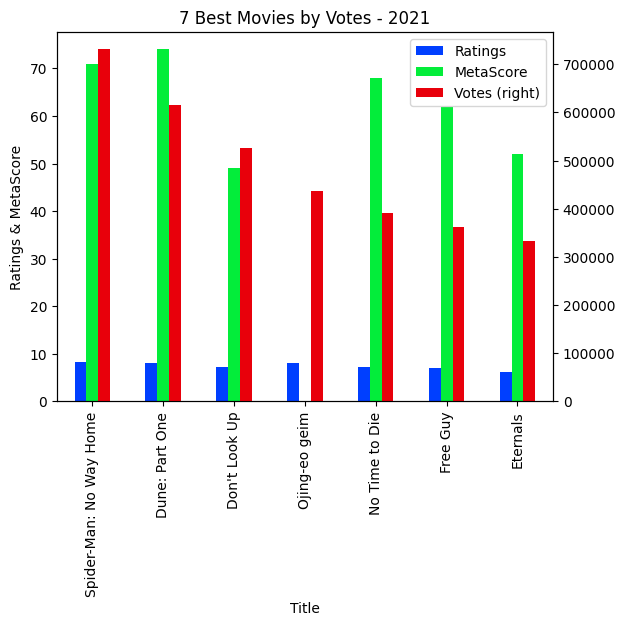

In [163]:
# Insight 3 - 7 Best Movies by Votes
Best03 = Movie2021.sort_values(by = 'Votes', ascending = False).head(7)
Best03.plot(kind = 'bar', title = '7 Best Movies by Votes - 2021', secondary_y='Votes', xlabel= 'Title', ylabel = 'Ratings & MetaScore', legend = True)

From Bar Chart above we have 7 best movies 2021 based on Votes. Only two Movies from previous category "Spider-Man: No Way Home" and "Dune: Part One" which enter to this list. Well i think we have the winner here. Only one movie that always on the list of the three categories above that is "Spider-Man: No Way Home".

Why we need this kind of chart, i think Votes category gives us comprehension which movie catches viewer attention to give credit by giving rating. The more vote, the more we trust the number behind rating and finally we dont wanna miss thoose movie.


In [159]:
# Insight Statistic Description
Movie2021.describe().round(3)

,Ratings,MetaScore,Votes
count,50.000,50.000,50.000
mean,7.210,25.580,129902.860
std,0.912,32.398,167202.348
min,5.400,0.000,1042.000
25%,6.375,0.000,14832.750
50%,7.250,0.000,66938.000
75%,7.975,61.250,150237.500
max,9.000,90.000,730655.000


From Table Above, we can see that the best and the worst rating in 2021, Lets take a note at MetaScore Mean, it show very low only 25.58 aout of 100. It Mean there are pretty much Movie that does not have MetaScore.
And take note to mean Votes

In [143]:
# Check MetaScore > 0 & Votes > 130000 
Subsetting01 = Movie2021[(Movie2021['MetaScore'] > 0) & (Movie2021['Votes'] > Movie2021['Votes'].mean())]
Subsetting01.reset_index()

,Title,Ratings,MetaScore,Votes
0,Spider-Man: No Way Home,8.3,71,730655
1,Dune: Part One,8.0,74,614595
2,No Time to Die,7.3,68,390356
3,The Matrix Resurrections,5.7,63,243307
4,House of Gucci,6.6,59,130021
5,Last Night in Soho,7.1,65,130465
6,Ghostbusters: Afterlife,7.1,45,176385
7,Eternals,6.3,52,333561
8,Don't Look Up,7.2,49,526606
9,The Last Duel,7.4,67,152174


Now we have Only 11 movies (22%) that have MetaScore & have Votes above Average (> 130000). Lest take a look to this 11 movies only.

<AxesSubplot:title={'center':'7 Best Movies Overall - 2021'}, xlabel='Title', ylabel='Ratings & MetaScore'>

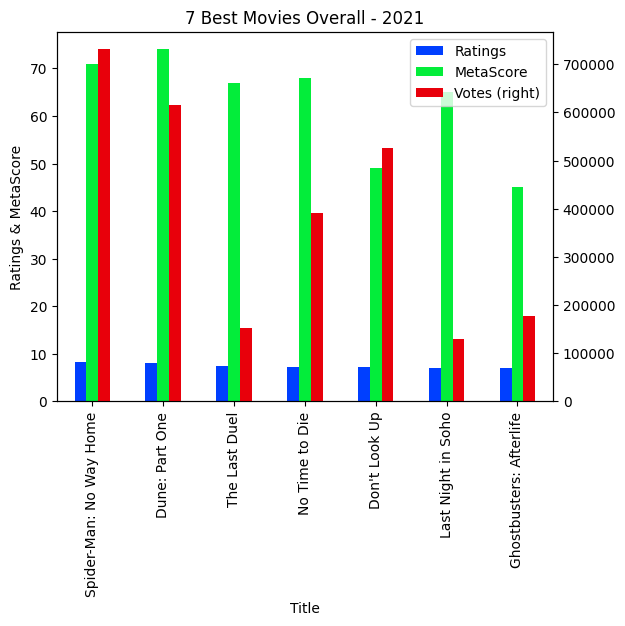

In [164]:
# Insight 4 - 7 Best Movies Final
Best04 = Subsetting01.sort_values(by = 'Ratings', ascending = False).head(7)
Best04.plot(kind = 'bar', title = '7 Best Movies Overall - 2021', secondary_y='Votes', xlabel= 'Title', ylabel = 'Ratings & MetaScore', legend = True)

From Bar Chart above we have 7 best movies 2021 based on Ratings and condition MetaScore > 0 & Votes above Average (> 130000).
At Least 3 Movies from previous still included.

##  Analysis and Conclusion

Here we have at least 4 insights :
1. Insight 1 - Best 7 Movies by Ratings
2. Insight 2 - Best 7 Movies by MetaScore
3. Insight 3 - Best 7 Movies by Votes
4. Insight 4 - Best 7 Movies by Ratings with condition MetaScore > 0 & Votes > 130000

Start from number one, we have the basic idea of what ratings mean, then we compare to number 2 and we have bias and inconsistent result. Then we try to look on to number 3, which no less important, show us which movies that attrach more attention. At last we have number 4 that combine all the sense by giving certain condition / assumption. Hopefully it is fair enough to give us alot of confidence to draw a conclusion of 7 Best Movies 2021.

As a conclusion, Here is the list of 7 Besy Movies 2021 :

Title                       Ratings MetaScore Votes
1. Spider-Man: No Way Home	    8.3	    71	  730655
2. Dune: Part One	            8.0	    74	  614595
3. The Last Duel	            7.4	    67	  152174
4. No Time to Die	            7.3	    68	  390356
5. Don't Look Up	            7.2	    49	  526606
6. Last Night in Soho	        7.1	    65	  130465
7. Ghostbusters: Afterlife	    7.1	    45	  176385

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


(Put your analysis and conclusion here.)

In [192]:
### Extra Challange
#Another Insight is to calculate frequency (to give us consistency)

Append_Table = Best01.append(Best02).append(Best03).append(Best04)
Best_Table = Append_Table.pivot_table(index = 'Title',
                                      values = 'Ratings',
                                      aggfunc = 'count')
Best_Table.sort_values(by = 'Ratings', ascending = False).head(7)

,Ratings
Title,
Spider-Man: No Way Home,4
Dune: Part One,3
Don't Look Up,2
No Time to Die,2
1883,1
Loki,1
Spencer,1


<AxesSubplot:title={'center':'7 Best Movie by Frequency - 2021 '}, xlabel='Title'>

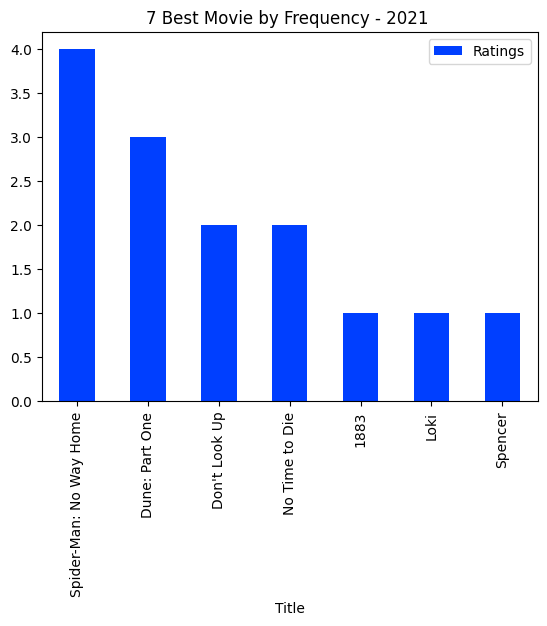

In [191]:
Best_Table.sort_values(by = 'Ratings', ascending = False).head(7).plot(kind = 'bar', title = "7 Best Movie by Frequency - 2021 ")